In [3]:
import numpy as np
import scipy.stats as si
import sympy as sy
import pandas as pd
from sympy import Symbol, solve

In [76]:
df = pd.read_csv('df.csv')
df = df.set_index(pd.to_datetime(df['date']))
df.head()

,date,company_symbol,risk_free,Current Liabilities,Long-Term Liabilities,Liabilities,vol,market_value,rating,change_direction
date,,,,,,,,,,
2013-02-27,2/27/2013,LUV,0.051708,5091.455604,6874.341753,11965.79736,NaN,8606.1020,10,NoChangeYet
2013-02-28,2/28/2013,LUV,0.050696,5101.857254,6872.611832,11974.46909,NaN,8518.7304,10,0
2013-03-01,3/1/2013,LUV,0.049830,5112.272545,6870.885969,11983.15851,NaN,8606.1020,10,0
2013-03-04,3/4/2013,LUV,0.048050,5143.559796,6865.740793,12009.30059,NaN,8766.2833,10,0
2013-03-05,3/5/2013,LUV,0.047699,5153.989181,6864.039230,12018.02841,NaN,8817.2501,10,0


In [22]:
universe = list(set(df.company_symbol.values))

NameError: name 'df' is not defined

In [78]:
df['r'] = df['risk_free'] /100

In [8]:
df.head()

,date,company_symbol,risk_free,Current Liabilities,Long-Term Liabilities,Liabilities,vol,market_value,r
date,,,,,,,,,
2013-02-27,2/27/2013,LUV,0.051708,5091.455604,6874.341753,11965.79736,NaN,8606.1020,0.000517
2013-02-28,2/28/2013,LUV,0.050696,5101.857254,6872.611832,11974.46909,NaN,8518.7304,0.000507
2013-03-01,3/1/2013,LUV,0.049830,5112.272545,6870.885969,11983.15851,NaN,8606.1020,0.000498
2013-03-04,3/4/2013,LUV,0.048050,5143.559796,6865.740793,12009.30059,NaN,8766.2833,0.000481
2013-03-05,3/5/2013,LUV,0.047699,5153.989181,6864.039230,12018.02841,NaN,8817.2501,0.000477


In [79]:
test = df[df.company_symbol == 'AIG']

In [80]:
test.tail()

,date,company_symbol,risk_free,Current Liabilities,Long-Term Liabilities,Liabilities,vol,market_value,rating,change_direction,r
date,,,,,,,,,,,
2018-03-29,3/29/2018,AIG,1.674260,NaN,NaN,435788.5987,0.010244,49144.7486,10,0,0.016743
2018-03-31,3/31/2018,AIG,1.693600,NaN,NaN,435786.0000,0.010241,NaN,10,0,0.016936
2018-04-02,4/2/2018,AIG,1.707796,NaN,NaN,435776.8149,0.010230,47970.7653,10,0,0.017078
2018-04-03,4/3/2018,AIG,1.713126,NaN,NaN,435769.8413,0.010256,48521.6344,10,0,0.017131
2018-04-04,4/4/2018,AIG,1.717362,NaN,NaN,435761.3489,0.010251,48964.1358,10,0,0.017174


In [83]:
from scipy.stats import norm
from sympy import nsolve
import scipy.optimize as sco

In [85]:
from numpy import *
from scipy.optimize import *
asset = list()
sig_asset = list()
de_prob = list()
for i in range(len(test)):
    if not np.isnan(test.iloc[i,6]):
        D = test.iloc[i,5]
        r = test.iloc[i,10]
        E = test.iloc[i,7]
        sig_e = test.iloc[i,6]
        def myFunction(z):
            x = z[0]
            sig_a = z[1]
            d1 = (np.log(x/D) + (r+0.5*sig_a**2)) / sig_a
            d2 = d1 - sig_a
            F = empty((2))
            F[0] = x * norm.cdf(d1) - np.exp(-r)*D*norm.cdf(d2) - E
            F[1] = (x/E) * norm.cdf(d1) * sig_a - sig_e
            return F
        zGuess = arr
        ay([test.iloc[i,5]*2, 0.10])
        z = fsolve(myFunction,zGuess)
        asset.append(z[0])
        sig_asset.append(z[1])
        DD = (np.log(z[0]/D) + r - 0.5*sig_a**2)/(sig_a)
        prob = norm.cdf(-DD)
        de_prob.append(prob)
        
    else:
        asset.append('nan')
        sig_asset.append('nan')
        de_prob.append('nan')
        

In [54]:
len(asset)

1950

In [55]:
test['asset'] = asset
test['sig_a'] = sig_asset

In [57]:
test = test.drop(['sig_A'], axis=1)

In [61]:
test['default_prob'] = de_prob

In [64]:
test.to_csv('default_AIG.csv')

In [86]:
Distance_to_Default = pd.DataFrame()
for ticker in universe:
    test = df[df.company_symbol == ticker]
    
    asset = list()
    sig_asset = list()
    de_prob = list()
    DD = list()
    
    for i in range(len(test)):
        if not np.isnan(test.iloc[i,6]):
            D = test.iloc[i,5]
            r = test.iloc[i,10]
            E = test.iloc[i,7]
            sig_e = test.iloc[i,6]
            def myFunction(z):
                x = z[0]
                sig_a = z[1]
                d1 = (np.log(x/D) + (r+0.5*sig_a**2)) / sig_a
                d2 = d1 - sig_a
                F = empty((2))
                F[0] = x * norm.cdf(d1) - np.exp(-r)*D*norm.cdf(d2) - E
                F[1] = (x/E) * norm.cdf(d1) * sig_a - sig_e
                return F
            zGuess = array([test.iloc[i,5]*2, 0.10])
            z = fsolve(myFunction,zGuess)
            asset.append(z[0])
            sig_asset.append(z[1])
            DD_ = (np.log(z[0]/D) + r - 0.5*sig_a**2)/(sig_a)
            prob = norm.cdf(-DD_)
            DD.append(DD_)
            de_prob.append(prob)

        else:
            asset.append('nan')
            sig_asset.append('nan')
            DD.append('nan')
            de_prob.append('nan')
        
    test['asset'] = asset
    test['sig_a'] = sig_asset
    test['default_prob'] = de_prob
    test['DD'] = DD
        
    Distance_to_Default = pd.concat([Distance_to_Default, test])

D:\anacondasetup\envs\project\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\anacondasetup\envs\project\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\anacondasetup\envs\project\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [28]:
AllResults = pd.DataFrame()
for ticker in universe:
    test = DD_nonan[DD_nonan.company_symbol == ticker]
    
    DC = list()
    
    for i in range(len(test)):
        if not np.isnan(test.iloc[i,6]):
            D = test.iloc[i,4]
            r = test.iloc[i,9]
            E = test.iloc[i,6]
            sig_e = test.iloc[i,5]
            sig_a = test.iloc[i,11]
            A = test.iloc[i,10]
            DC_ = (np.log(A/(1.08696*D)) + r - 0.5*sig_a**2)/(sig_a)
            DC.append(DC_)

        else:
            DC.append('nan')
        
    test['DC'] = DC
        
    AllResults = pd.concat([AllResults, test])

D:\anacondasetup\envs\project\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
universe = list(set(AllResults.company_symbol.values))

In [30]:
AllResults = AllResults.dropna(subset=['market_value'])

In [31]:
AllResults.to_csv('AllResults_DD.csv')

In [82]:
AllResults = pd.read_csv('AllResults_DD.csv')

D:\anacondasetup\envs\project\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
AllResults = AllResults.set_index(pd.to_datetime(AllResults['date']))
AllResults = AllResults.drop(['date'], axis=1)

In [84]:
AllResults.head()

,company_symbol,risk_free,Current Liabilities,Long-Term Liabilities,Liabilities,vol,market_value,rating,change_direction,r,asset,sig_a,default_prob,DD,DC,DP
date,,,,,,,,,,,,,,,,
2012-06-19,MRO,0.033288,4544.961816,9803.171812,14348.13363,0.026487,17498.9742,9.0,0.0,0.000333,31842.33236,0.014556,0.0,79.745962,49.054073,0
2012-06-20,MRO,0.033908,4555.199286,9801.434684,14356.63397,0.026441,17414.3359,9.0,0.0,0.000339,31766.10263,0.014495,0.0,79.447671,49.053250,0
2012-06-21,MRO,0.034565,4566.013304,9799.524435,14365.53774,0.026671,16448.0483,9.0,0.0,0.000346,30808.62141,0.014239,0.0,76.325809,47.742580,0
2012-06-22,MRO,0.035255,4577.414268,9797.437781,14374.85205,0.026664,16744.2825,9.0,0.0,0.000353,31114.06761,0.014350,0.0,77.248231,48.018213,0
2012-06-25,MRO,0.037466,4615.242835,9790.086562,14405.32940,0.026589,16709.0165,9.0,0.0,0.000375,31108.94975,0.014281,0.0,77.022198,48.089780,0


In [85]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
%config InlineBackend.figure_format = 'svg'
%matplotlib notebook

In [86]:
AIG = AllResults[AllResults.company_symbol == 'AES']

In [87]:
AIG.head()

,company_symbol,risk_free,Current Liabilities,Long-Term Liabilities,Liabilities,vol,market_value,rating,change_direction,r,asset,sig_a,default_prob,DD,DC,DP
date,,,,,,,,,,,,,,,,
2012-11-14,AES,0.129896,7857.397896,25910.21272,33767.61061,0.013650,7275.9398,11.0,0.0,0.001299,40999.71597,0.002422,2.980000e-85,19.531203,46.224281,2.98
2012-11-15,AES,0.131143,7865.116605,25910.38569,33775.50229,0.013593,7231.3021,11.0,0.0,0.001311,40962.53914,0.002400,2.700000e-84,19.418365,46.194410,2.7E
2012-11-16,AES,0.132238,7872.889552,25910.56538,33783.45493,0.013578,7357.7755,11.0,0.0,0.001322,41096.58531,0.002431,6.890000e-87,19.722623,46.850460,6.89
2012-11-19,AES,0.134525,7896.558604,25911.14074,33807.69934,0.013384,7417.2924,11.0,0.0,0.001345,41179.54239,0.002411,5.010000e-88,19.854827,47.789147,5.01
2012-11-20,AES,0.134926,7904.573288,25911.34326,33815.91654,0.013385,7380.0943,11.0,0.0,0.001349,41150.41515,0.002401,3.280000e-87,19.760168,47.599111,3.28


In [91]:
##plot default_prob
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.5)
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)
ax1.plot(AIG.index, AIG.default_prob,c = 'r'
              ,linewidth=0.3 )
ax1.set_ylabel('default_prob')
ax1.title.set_text('AES')
ax2.set_ylabel('rating')
ax2.plot(AIG.index, AIG.rating)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


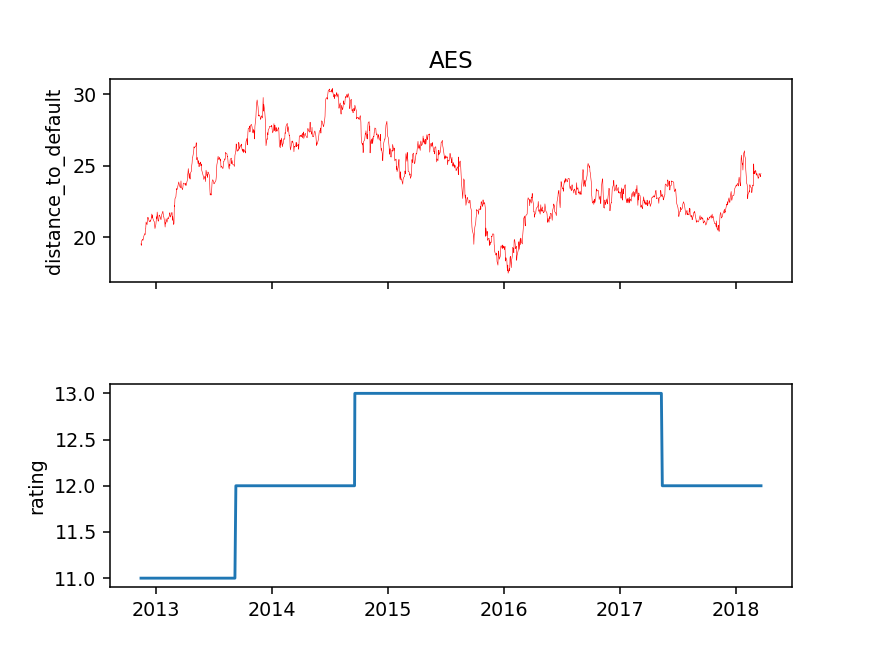

In [77]:
#plot DD
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.5)
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)
ax1.plot(AIG.index, AIG.DD,c = 'r'
              ,label='distance_to_default',linewidth=0.3 )
ax1.set_ylabel('distance_to_default')
ax1.title.set_text('AES')
ax2.set_ylabel('rating')
ax2.plot(AIG.index, AIG.rating)
plt.show()

<IPython.core.display.Javascript object>


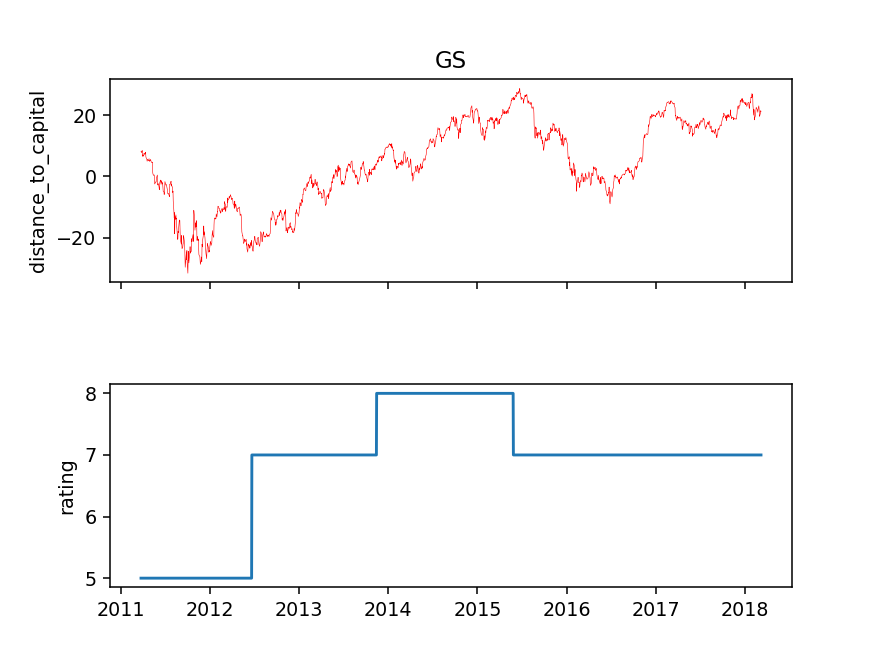

In [74]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.5)
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)
ax1.plot(AIG.index, AIG.DC,c = 'r'
              ,label='distance_to_default',linewidth=0.3 )
ax1.set_ylabel('distance_to_capital')
ax1.title.set_text('GS')
ax2.set_ylabel('rating')
ax2.plot(AIG.index, AIG.rating)
plt.show()